In [2]:
from warnings import warn

import pandas as pd
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# crawl_url = "https://www.imdb.com/search/title/?release_date=2022-01-01,2023-09-26&sort=num_votes,desc," \
#             "&start={}&ref_=adv_nxt".format(page)

# 2021 - 2022
# crawl_url = "https://www.imdb.com/search/title/?release_date=2021-01-01,2022-01-01&sort=num_votes,desc," \
#             "&start={}&ref_=adv_nxt"

In [3]:
def urls_crawl(source_domain = "https://www.imdb.com", crawl_url = "https://www.imdb.com/search/title/?release_date=2022-01-01,2023-09-26&sort=num_votes,desc," \
            "&start={}&ref_=adv_nxt", page_range = range(0,50)): 
    request = 1

    urls = []
    for i in tqdm(page_range):
        # Generate the page
        page = i * 50 + 1

        # Url
        url = crawl_url.format(page)

        # Send the request and Get the response
        response = requests.get(url)
        
        # If status is not 200 then show an warning with request number
        if response.status_code != 200:
            warn("{} no. has status code {}\n{}\n".format(request, response.status_code, url))
        request += 1
        
        # Make Soup
        soup = BeautifulSoup(response.text, "html.parser")

        # Fetch the data
        lister_items = soup.find_all("h3", class_="lister-item-header")

        # Get the data
        for single_item in lister_items:
            url = single_item.find("a")['href']
            if url:
                # Generate the user review
                url = source_domain + url + "reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0"
                # print(url)
                urls.append(url)

    # Store the data to csv format
    data_frame = pd.DataFrame({
        "review_urls": urls,
    })
    return data_frame

In [ ]:
data_frame = urls_crawl()
# data_frame.to_csv("data/review_urls.csv", index=False)
print("All data successfully added")

### Review

In [43]:
review_urls = pd.read_csv("data/review_urls.csv")
review_urls

,review_urls
0,https://www.imdb.com/title/tt1877830/reviews?s...
1,https://www.imdb.com/title/tt1745960/reviews?s...
2,https://www.imdb.com/title/tt10811166/reviews?...
3,https://www.imdb.com/title/tt6710474/reviews?s...
4,https://www.imdb.com/title/tt1630029/reviews?s...
...,...
2495,https://www.imdb.com/title/tt13635702/reviews?...
2496,https://www.imdb.com/title/tt17372734/reviews?...
2497,https://www.imdb.com/title/tt12327578/reviews?...
2498,https://www.imdb.com/title/tt15568702/reviews?...


In [44]:
# range(1,11) (rating star) -> all 
def crawl(batch = review_urls['review_urls'][0:1000], rate_filter = range(1,11)):
    reviews = []
    rates = []
    for idx, url in enumerate(tqdm(batch), start=1):
        try:
            response = requests.get(url, timeout=10)
            
            soup = BeautifulSoup(response.text, 'html.parser')
            
            lister_items = soup.find_all("div", class_="lister-item-content")

            for idx, item in enumerate(lister_items, start=1):
                try:
                    # --- Rating ---
                    rate = item.find('div','ipl-ratings-bar').text if item.find('div','ipl-ratings-bar') else None
                    # print()
                    # Loại bỏ ký tự dư thừa
                    if rate:
                        rate = rate.replace('\n','')
                        rate = rate.replace('/10','')
                        if int(rate) in rate_filter:
                            rates.append(rate)
                        else:
                            continue
                    else:
                        continue
                    # --- Content ---
                    content = item.find('div', 'text show-more__control').text if item.find('div', 'text show-more__control') else None
                    if content:
                        reviews.append(content)
                    else:
                        continue
                except Exception as e:
                    print(f"Lỗi khi xử lý item thứ {idx} trong URL {url}: {str(e)}")
            
        except requests.exceptions.RequestException as e:
            print(f"Lỗi khi truy cập URL {url} ở vòng lặp thứ {idx} : {str(e)}")    
    return rates, reviews


In [7]:
# --- Batch 1 --- 
rates, reviews = crawl(batch = review_urls['review_urls'][0:500])
# Store the data to csv format
data_frame = pd.DataFrame({
    "Review": reviews,
    "Rate" : rates
})

data_frame.to_csv("data/batch1_IMDB_reviews.csv", index=False)
print("All data successfully added")

  0%|          | 0/500 [00:00<?, ?it/s]

 23%|██▎       | 114/500 [04:01<30:32,  4.75s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt12003946/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 114 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


 64%|██████▍   | 320/500 [10:45<14:02,  4.68s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt13640670/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 320 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


100%|██████████| 500/500 [16:30<00:00,  1.98s/it]


All data successfully added


In [20]:
# --- Batch 2 --- 
rates, reviews = crawl(batch = review_urls['review_urls'][500:1000])
# Store the data to csv format
data_frame = pd.DataFrame({
    "Review": reviews,
    "Rate" : rates
})

data_frame.to_csv("data/batch2_IMDB_reviews.csv", index=False)
print("All data successfully added")

100%|██████████| 500/500 [15:37<00:00,  1.87s/it]


All data successfully added


In [6]:
# --- Batch 3 --- 
rates, reviews = crawl(batch = review_urls['review_urls'][1000:1500])
# Store the data to csv format
data_frame = pd.DataFrame({
    "Review": reviews,
    "Rate" : rates
})

data_frame.to_csv("data/batch3_IMDB_reviews.csv", index=False)
print("All data successfully added")

 16%|█▌        | 80/500 [02:29<33:00,  4.71s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt27726927/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 80 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


 43%|████▎     | 215/500 [06:43<22:27,  4.73s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt28282716/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 215 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


 43%|████▎     | 216/500 [06:56<33:09,  7.01s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt15717242/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 216 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


 84%|████████▎ | 418/500 [13:03<06:25,  4.70s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt1520211/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 418 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


100%|██████████| 500/500 [15:37<00:00,  1.87s/it]


All data successfully added


In [7]:
# --- Batch 4 --- 
rates, reviews = crawl(batch = review_urls['review_urls'][1500:2000])
# Store the data to csv format
data_frame = pd.DataFrame({
    "Review": reviews,
    "Rate" : rates
})

data_frame.to_csv("data/batch4_IMDB_reviews.csv", index=False)
print("All data successfully added")

 38%|███▊      | 188/500 [05:53<24:24,  4.69s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt15481952/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 188 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


 38%|███▊      | 189/500 [06:04<35:00,  6.75s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt28970408/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 189 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


 84%|████████▎ | 418/500 [13:16<06:09,  4.50s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt14452776/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 418 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


 84%|████████▍ | 419/500 [13:27<08:48,  6.53s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt13654122/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 419 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


100%|██████████| 500/500 [15:46<00:00,  1.89s/it]


All data successfully added


In [8]:
# --- Batch 5 --- 
rates, reviews = crawl(batch = review_urls['review_urls'][2000:])
# Store the data to csv format
data_frame = pd.DataFrame({
    "Review": reviews,
    "Rate" : rates
})

data_frame.to_csv("data/batch5_IMDB_reviews.csv", index=False)
print("All data successfully added")

 23%|██▎       | 117/500 [03:37<30:24,  4.76s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt11743610/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 117 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


 68%|██████▊   | 341/500 [10:34<12:16,  4.63s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt21874046/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 341 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


100%|██████████| 500/500 [15:17<00:00,  1.83s/it]


All data successfully added


## raw data

In [9]:
batch1 = pd.read_csv("data/batch1_IMDB_reviews.csv")
batch2 = pd.read_csv("data/batch2_IMDB_reviews.csv")
batch3 = pd.read_csv("data/batch3_IMDB_reviews.csv")
batch4 = pd.read_csv("data/batch4_IMDB_reviews.csv")
batch5 = pd.read_csv("data/batch5_IMDB_reviews.csv")


In [26]:
batch1

,Review,Rate
0,\nDetective Batman at its peak! Great storylin...,9
1,\nI just got out of The BatmanThis movie reall...,8
2,"\nThe Riddler(Paul Dano, spot-on. How did it t...",9
3,"\nA serial killer strikes in Gotham City, kill...",7
4,"\nMatt Reeves The Batman is a hell of a movie,...",9
...,...,...
12112,\nTwists and turns through a desolate Aussie l...,8
12113,"\nI enjoyed this a lot. Good pacing, interesti...",8
12114,\nOh dear. This shockingly fourth-rate product...,3
12115,"\nJeez, saw some of the reviews and saw, writt...",10


In [10]:
raw_data = pd.concat([batch1, batch2, batch3, batch4, batch5], ignore_index=True)

In [11]:
raw_data

,Review,Rate
0,\nDetective Batman at its peak! Great storylin...,9
1,\nI just got out of The BatmanThis movie reall...,8
2,"\nThe Riddler(Paul Dano, spot-on. How did it t...",9
3,"\nA serial killer strikes in Gotham City, kill...",7
4,"\nMatt Reeves The Batman is a hell of a movie,...",9
...,...,...
57546,"The series starts a bit weakly, but gradually ...",9
57547,First Marie Antoinette was between 14 and 15 a...,4
57548,"That was so unbelievably bad, I have no words ...",1
57549,The worst depiction of Marie Antoinette's life...,1


In [12]:
raw_data.to_csv("data/raw_data.csv", index=False)

In [16]:
labeled_raw_data = raw_data.copy()

In [17]:
labeled_raw_data

,Review,Rate
0,\nDetective Batman at its peak! Great storylin...,9
1,\nI just got out of The BatmanThis movie reall...,8
2,"\nThe Riddler(Paul Dano, spot-on. How did it t...",9
3,"\nA serial killer strikes in Gotham City, kill...",7
4,"\nMatt Reeves The Batman is a hell of a movie,...",9
...,...,...
57546,"The series starts a bit weakly, but gradually ...",9
57547,First Marie Antoinette was between 14 and 15 a...,4
57548,"That was so unbelievably bad, I have no words ...",1
57549,The worst depiction of Marie Antoinette's life...,1


#### Gán nhãn

In [18]:
# Định nghĩa hàm ánh xạ giá trị rate sang nhãn
def map_to_label(rate):
    if rate >= 7:
        return 'positive'
    elif rate >= 4:
        return 'neutral'
    else:
        return 'negative'

# Sử dụng hàm ánh xạ để tạo cột nhãn mới
labeled_raw_data['Label'] = labeled_raw_data['Rate'].map(map_to_label)

# In ra DataFrame sau khi thêm cột nhãn
print(labeled_raw_data)

                                                  Review  Rate     Label
0      \nDetective Batman at its peak! Great storylin...     9  positive
1      \nI just got out of The BatmanThis movie reall...     8  positive
2      \nThe Riddler(Paul Dano, spot-on. How did it t...     9  positive
3      \nA serial killer strikes in Gotham City, kill...     7  positive
4      \nMatt Reeves The Batman is a hell of a movie,...     9  positive
...                                                  ...   ...       ...
57546  The series starts a bit weakly, but gradually ...     9  positive
57547  First Marie Antoinette was between 14 and 15 a...     4   neutral
57548  That was so unbelievably bad, I have no words ...     1  negative
57549  The worst depiction of Marie Antoinette's life...     1  negative
57550  Wasn't sure I could cope with another batch of...     7  positive

[57551 rows x 3 columns]


#### Phân bố class

In [19]:
labeled_raw_data.to_csv("data/labeled_raw_data.csv", index=False)

In [120]:
labeled_raw_data = pd.read_csv("./data/labeled_raw_data.csv")

In [121]:
class_counts = labeled_raw_data['Label'].value_counts()
class_counts

positive    37030
negative    10268
neutral     10253
Name: Label, dtype: int64

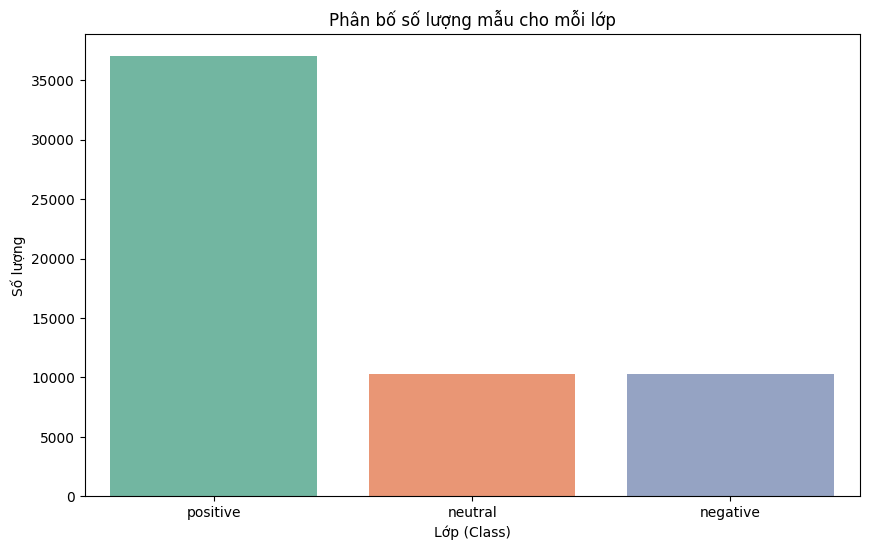

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=labeled_raw_data, x='Label', palette='Set2')
plt.title('Phân bố số lượng mẫu cho mỗi lớp')
plt.xlabel('Lớp (Class)')
plt.ylabel('Số lượng')
plt.show()

#### Crawl thêm để cân bằng lại dữ liệu

In [5]:
# 2022 - 2023
# crawl_url = "https://www.imdb.com/search/title/?release_date=2022-01-01,2023-09-26&sort=num_votes,desc," \
#             "&start={}&ref_=adv_nxt"

# 2020
crawl_url = "https://www.imdb.com/search/title/?release_date=2020-01-01,2021-01-01&sort=num_votes,desc," \
            "&start={}&ref_=adv_nxt"

In [19]:
additional_data_frame_3 = urls_crawl(page_range=range(0,50), crawl_url= crawl_url)

100%|██████████| 50/50 [02:18<00:00,  2.78s/it]


In [20]:
additional_data_frame_3

,review_urls
0,https://www.imdb.com/title/tt6723592/reviews?s...
1,https://www.imdb.com/title/tt10048342/reviews?...
2,https://www.imdb.com/title/tt2948372/reviews?s...
3,https://www.imdb.com/title/tt10986410/reviews?...
4,https://www.imdb.com/title/tt7126948/reviews?s...
...,...
2495,https://www.imdb.com/title/tt8134186/reviews?s...
2496,https://www.imdb.com/title/tt8962124/reviews?s...
2497,https://www.imdb.com/title/tt2573372/reviews?s...
2498,https://www.imdb.com/title/tt11007186/reviews?...


##### Lọc trùng nhau

In [21]:
print(additional_data_frame_3.duplicated().sum())
additional_data_frame_3 = additional_data_frame_3.drop_duplicates()

778


In [22]:
additional_data_frame_3

,review_urls
0,https://www.imdb.com/title/tt6723592/reviews?s...
1,https://www.imdb.com/title/tt10048342/reviews?...
2,https://www.imdb.com/title/tt2948372/reviews?s...
3,https://www.imdb.com/title/tt10986410/reviews?...
4,https://www.imdb.com/title/tt7126948/reviews?s...
...,...
2483,https://www.imdb.com/title/tt9797932/reviews?s...
2487,https://www.imdb.com/title/tt9731360/reviews?s...
2488,https://www.imdb.com/title/tt11625100/reviews?...
2489,https://www.imdb.com/title/tt8200456/reviews?s...


In [24]:
df1 = pd.read_csv("data/additional_review_urls.csv")
df2 = pd.read_csv("data/additional_review_urls_2.csv")
df3 = pd.read_csv("data/review_urls.csv")

In [18]:
# Chọn các cột cụ thể để so sánh
columns_to_compare = ['review_urls']

# Nối hai DataFrame theo các cột cụ thể
merged_df = df3.merge(additional_data_frame_3, on=columns_to_compare, how='outer', indicator=True)

# Lọc các hàng có giá trị chỉ mục là 'both' (tức là có trong cả hai DataFrame)
common_rows = merged_df[merged_df['_merge'] == 'both']

if not common_rows.empty:
    print("Có các hàng giống nhau giữa hai tệp CSV.")
    print(common_rows)
else:
    print("Không có hàng nào giống nhau giữa hai tệp CSV.")

Có các hàng giống nhau giữa hai tệp CSV.
                                            review_urls _merge
362   https://www.imdb.com/title/tt2560140/reviews?s...   both
363   https://www.imdb.com/title/tt2560140/reviews?s...   both
364   https://www.imdb.com/title/tt2560140/reviews?s...   both
365   https://www.imdb.com/title/tt2560140/reviews?s...   both
366   https://www.imdb.com/title/tt2560140/reviews?s...   both
...                                                 ...    ...
2167  https://www.imdb.com/title/tt0436992/reviews?s...   both
2239  https://www.imdb.com/title/tt5555260/reviews?s...   both
2240  https://www.imdb.com/title/tt5555260/reviews?s...   both
2426  https://www.imdb.com/title/tt10795658/reviews?...   both
2478  https://www.imdb.com/title/tt4236770/reviews?s...   both

[226 rows x 2 columns]


In [36]:
# Chọn các cột cụ thể để so sánh
columns_to_compare = ['review_urls']

# Nối hai DataFrame theo các cột cụ thể và sử dụng tham số 'indicator' để thêm cột chỉ mục
merged_df = additional_data_frame_3.merge(df1[columns_to_compare], on=columns_to_compare, how='left', indicator=True)

# Lọc các hàng có giá trị chỉ mục là 'left_only' (tức là chỉ xuất hiện trong df2)
additional_data_frame_3_no_duplicates = merged_df[merged_df['_merge'] == 'left_only'].drop(columns=['_merge'])

print("DataFrame df2 sau khi loại bỏ các hàng trùng với df1:")
print(additional_data_frame_3_no_duplicates)

DataFrame df2 sau khi loại bỏ các hàng trùng với df1:
                                            review_urls
0     https://www.imdb.com/title/tt6723592/reviews?s...
1     https://www.imdb.com/title/tt10048342/reviews?...
2     https://www.imdb.com/title/tt2948372/reviews?s...
3     https://www.imdb.com/title/tt10986410/reviews?...
4     https://www.imdb.com/title/tt7126948/reviews?s...
...                                                 ...
1926  https://www.imdb.com/title/tt9797932/reviews?s...
1927  https://www.imdb.com/title/tt9731360/reviews?s...
1928  https://www.imdb.com/title/tt11625100/reviews?...
1929  https://www.imdb.com/title/tt8200456/reviews?s...
1930  https://www.imdb.com/title/tt2573372/reviews?s...

[1681 rows x 1 columns]


In [37]:
# Chọn các cột cụ thể để so sánh
columns_to_compare = ['review_urls']

# Nối hai DataFrame theo các cột cụ thể và sử dụng tham số 'indicator' để thêm cột chỉ mục
merged_df = additional_data_frame_3_no_duplicates.merge(df2[columns_to_compare], on=columns_to_compare, how='left', indicator=True)

# Lọc các hàng có giá trị chỉ mục là 'left_only' (tức là chỉ xuất hiện trong df2)
additional_data_frame_3_no_duplicates = merged_df[merged_df['_merge'] == 'left_only'].drop(columns=['_merge'])

print("DataFrame additional_data_frame_3 sau khi loại bỏ các hàng trùng với df2:")
print(additional_data_frame_3_no_duplicates)

DataFrame additional_data_frame_3 sau khi loại bỏ các hàng trùng với df2:
                                            review_urls
0     https://www.imdb.com/title/tt6723592/reviews?s...
1     https://www.imdb.com/title/tt10048342/reviews?...
2     https://www.imdb.com/title/tt2948372/reviews?s...
3     https://www.imdb.com/title/tt10986410/reviews?...
4     https://www.imdb.com/title/tt7126948/reviews?s...
...                                                 ...
1977  https://www.imdb.com/title/tt9797932/reviews?s...
1978  https://www.imdb.com/title/tt9731360/reviews?s...
1979  https://www.imdb.com/title/tt11625100/reviews?...
1980  https://www.imdb.com/title/tt8200456/reviews?s...
1981  https://www.imdb.com/title/tt2573372/reviews?s...

[1641 rows x 1 columns]


In [38]:
# Chọn các cột cụ thể để so sánh
columns_to_compare = ['review_urls']

# Nối hai DataFrame theo các cột cụ thể và sử dụng tham số 'indicator' để thêm cột chỉ mục
merged_df = additional_data_frame_3_no_duplicates.merge(df3[columns_to_compare], on=columns_to_compare, how='left', indicator=True)

# Lọc các hàng có giá trị chỉ mục là 'left_only' (tức là chỉ xuất hiện trong df2)
additional_data_frame_3_no_duplicates = merged_df[merged_df['_merge'] == 'left_only'].drop(columns=['_merge'])

print("DataFrame additional_data_frame_3 sau khi loại bỏ các hàng trùng với df3:")
print(additional_data_frame_3_no_duplicates)

DataFrame additional_data_frame_3 sau khi loại bỏ các hàng trùng với df3:
                                            review_urls
0     https://www.imdb.com/title/tt6723592/reviews?s...
1     https://www.imdb.com/title/tt10048342/reviews?...
2     https://www.imdb.com/title/tt2948372/reviews?s...
15    https://www.imdb.com/title/tt7126948/reviews?s...
16    https://www.imdb.com/title/tt8332922/reviews?s...
...                                                 ...
1764  https://www.imdb.com/title/tt9797932/reviews?s...
1765  https://www.imdb.com/title/tt9731360/reviews?s...
1766  https://www.imdb.com/title/tt11625100/reviews?...
1767  https://www.imdb.com/title/tt8200456/reviews?s...
1768  https://www.imdb.com/title/tt2573372/reviews?s...

[1628 rows x 1 columns]


In [39]:
additional_data_frame_3_no_duplicates.to_csv("data/additional_review_urls_3.csv", index=False)
print("All data successfully added")

All data successfully added


#### Additional review crawl

##### Batch 6-10

In [115]:
additional_review_urls = pd.read_csv("data/additional_review_urls.csv")
additional_review_urls

,review_urls
0,https://www.imdb.com/title/tt14954666/reviews?...
1,https://www.imdb.com/title/tt13557082/reviews?...
2,https://www.imdb.com/title/tt4786824/reviews?s...
3,https://www.imdb.com/title/tt20100884/reviews?...
4,https://www.imdb.com/title/tt19800324/reviews?...
...,...
2495,https://www.imdb.com/title/tt7120662/reviews?s...
2496,https://www.imdb.com/title/tt12415670/reviews?...
2497,https://www.imdb.com/title/tt10574236/reviews?...
2498,https://www.imdb.com/title/tt14379784/reviews?...


Lọc chỉ lấy rate từ 1 tới 6 -> range(1,7)

In [61]:
# --- Batch 6 --- 
rates, reviews = crawl(batch = additional_review_urls['review_urls'][0:500], rate_filter=range(1,7))
# Store the data to csv format
data_frame = pd.DataFrame({
    "Review": reviews,
    "Rate" : rates
})

data_frame.to_csv("data/batch6_IMDB_reviews.csv", index=False)
print("All data successfully added")

 12%|█▏        | 58/500 [02:01<34:11,  4.64s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt19781688/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 58 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


 81%|████████  | 403/500 [12:15<02:16,  1.41s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt5057054/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 403 : ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


 86%|████████▌ | 429/500 [13:14<05:26,  4.60s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt20855732/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 429 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


100%|██████████| 500/500 [15:19<00:00,  1.84s/it]


All data successfully added


In [66]:
# --- Batch 7 --- 
rates, reviews = crawl(batch = additional_review_urls['review_urls'][500:1000], rate_filter=range(1,7))
# Store the data to csv format
data_frame = pd.DataFrame({
    "Review": reviews,
    "Rate" : rates
})

data_frame.to_csv("data/batch7_IMDB_reviews.csv", index=False)
print("All data successfully added")

 23%|██▎       | 117/500 [03:55<30:17,  4.75s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt21051458/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 117 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


 69%|██████▉   | 344/500 [11:11<12:19,  4.74s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt21109538/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 344 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


100%|██████████| 500/500 [15:59<00:00,  1.92s/it]


All data successfully added


In [67]:
# --- Batch 8 --- 
rates, reviews = crawl(batch = additional_review_urls['review_urls'][1000:1500], rate_filter=range(1,7))
# Store the data to csv format
data_frame = pd.DataFrame({
    "Review": reviews,
    "Rate" : rates
})

data_frame.to_csv("data/batch8_IMDB_reviews.csv", index=False)
print("All data successfully added")

  1%|▏         | 7/500 [00:20<39:16,  4.78s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt28253602/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 7 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


 72%|███████▏  | 362/500 [11:03<11:44,  5.11s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt11006642/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 362 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


 95%|█████████▌| 476/500 [14:35<01:51,  4.64s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt14206696/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 476 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


100%|██████████| 500/500 [15:17<00:00,  1.84s/it]


All data successfully added


In [68]:
# --- Batch 9 --- 
rates, reviews = crawl(batch = additional_review_urls['review_urls'][1500:2000], rate_filter=range(1,7))
# Store the data to csv format
data_frame = pd.DataFrame({
    "Review": reviews,
    "Rate" : rates
})

data_frame.to_csv("data/batch9_IMDB_reviews.csv", index=False)
print("All data successfully added")

 55%|█████▍    | 274/500 [08:06<17:25,  4.62s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt14690552/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 274 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


 95%|█████████▌| 475/500 [14:09<01:56,  4.67s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt14275050/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 475 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


100%|██████████| 500/500 [14:56<00:00,  1.79s/it]


All data successfully added


In [69]:
# --- Batch 10 --- 
rates, reviews = crawl(batch = additional_review_urls['review_urls'][2000:], rate_filter=range(1,7))
# Store the data to csv format
data_frame = pd.DataFrame({
    "Review": reviews,
    "Rate" : rates
})

data_frame.to_csv("data/batch10_IMDB_reviews.csv", index=False)
print("All data successfully added")

 43%|████▎     | 215/500 [06:32<21:39,  4.56s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt12948838/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 215 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


 91%|█████████ | 455/500 [13:50<03:26,  4.59s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt17550758/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 455 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


100%|██████████| 500/500 [15:09<00:00,  1.82s/it]


All data successfully added


##### Batch 11-20

In [80]:
additional_review_urls_2 = pd.read_csv("data/additional_review_urls_2.csv")
additional_review_urls_2

,review_urls
0,https://www.imdb.com/title/tt12074628/reviews?...
1,https://www.imdb.com/title/tt14590210/reviews?...
2,https://www.imdb.com/title/tt28228754/reviews?...
3,https://www.imdb.com/title/tt27161773/reviews?...
4,https://www.imdb.com/title/tt13358054/reviews?...
...,...
4995,https://www.imdb.com/title/tt10869834/reviews?...
4996,https://www.imdb.com/title/tt14772170/reviews?...
4997,https://www.imdb.com/title/tt21161156/reviews?...
4998,https://www.imdb.com/title/tt6524350/reviews?s...


Lọc chỉ lấy rate từ 1 tới 6 -> range(1,7)

In [92]:
# --- Batch 11 --- 
rates, reviews = crawl(batch = additional_review_urls_2['review_urls'][0:500], rate_filter=range(1,7))
# Store the data to csv format
data_frame = pd.DataFrame({
    "Review": reviews,
    "Rate" : rates
})

data_frame.to_csv("data/batch11_IMDB_reviews.csv", index=False)
print("All data successfully added")

 24%|██▍       | 121/500 [03:15<10:48,  1.71s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt3007572/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 121 : ("Connection broken: ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None)", ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


 70%|██████▉   | 348/500 [10:08<12:05,  4.78s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt19719862/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 348 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


100%|██████████| 500/500 [14:38<00:00,  1.76s/it]


All data successfully added


In [93]:
# --- Batch 12 --- 
rates, reviews = crawl(batch = additional_review_urls_2['review_urls'][500:1000], rate_filter=range(1,7))
# Store the data to csv format
data_frame = pd.DataFrame({
    "Review": reviews,
    "Rate" : rates
})

data_frame.to_csv("data/batch12_IMDB_reviews.csv", index=False)
print("All data successfully added")

  9%|▉         | 47/500 [01:23<14:06,  1.87s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt11771270/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 47 : ("Connection broken: ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None)", ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


 15%|█▍        | 74/500 [02:21<33:07,  4.67s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt14369952/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 74 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


 62%|██████▏   | 312/500 [09:25<04:57,  1.58s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt25134264/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 312 : ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


 68%|██████▊   | 341/500 [10:25<12:04,  4.56s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt14016500/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 341 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


 81%|████████  | 406/500 [12:24<03:02,  1.94s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt11324406/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 406 : ("Connection broken: ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None)", ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


100%|██████████| 500/500 [15:10<00:00,  1.82s/it]


All data successfully added


In [94]:
# --- Batch 13 --- 
rates, reviews = crawl(batch = additional_review_urls_2['review_urls'][1000:1500], rate_filter=range(1,7))
# Store the data to csv format
data_frame = pd.DataFrame({
    "Review": reviews,
    "Rate" : rates
})

data_frame.to_csv("data/batch13_IMDB_reviews.csv", index=False)
print("All data successfully added")

 16%|█▌        | 81/500 [02:30<33:35,  4.81s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt7440726/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 81 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


 61%|██████    | 306/500 [09:22<15:02,  4.65s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt15248880/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 306 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


100%|██████████| 500/500 [15:00<00:00,  1.80s/it]


All data successfully added


In [95]:
# --- Batch 14 --- 
rates, reviews = crawl(batch = additional_review_urls_2['review_urls'][1500:2000], rate_filter=range(1,7))
# Store the data to csv format
data_frame = pd.DataFrame({
    "Review": reviews,
    "Rate" : rates
})

data_frame.to_csv("data/batch14_IMDB_reviews.csv", index=False)
print("All data successfully added")

 58%|█████▊    | 290/500 [08:55<16:47,  4.80s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt27590147/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 290 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


100%|██████████| 500/500 [15:09<00:00,  1.82s/it]


All data successfully added


In [96]:
# --- Batch 15 --- 
rates, reviews = crawl(batch = additional_review_urls_2['review_urls'][2000:2500], rate_filter=range(1,7))
# Store the data to csv format
data_frame = pd.DataFrame({
    "Review": reviews,
    "Rate" : rates
})

data_frame.to_csv("data/batch15_IMDB_reviews.csv", index=False)
print("All data successfully added")

  6%|▌         | 30/500 [01:01<36:15,  4.63s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt13195218/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 30 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


 23%|██▎       | 115/500 [03:33<28:21,  4.42s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt14507354/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 115 : HTTPSConnectionPool(host='www.imdb.com', port=443): Max retries exceeded with url: /title/tt14507354/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000018F6A7D7A00>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


 92%|█████████▏| 461/500 [13:39<03:07,  4.80s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt21227238/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 461 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


100%|██████████| 500/500 [14:49<00:00,  1.78s/it]


All data successfully added


In [97]:
# --- Batch 16 --- 
rates, reviews = crawl(batch = additional_review_urls_2['review_urls'][2500:3000], rate_filter=range(1,7))
# Store the data to csv format
data_frame = pd.DataFrame({
    "Review": reviews,
    "Rate" : rates
})

data_frame.to_csv("data/batch16_IMDB_reviews.csv", index=False)
print("All data successfully added")

 41%|████▏     | 207/500 [06:08<22:10,  4.54s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt20859904/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 207 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


100%|██████████| 500/500 [14:26<00:00,  1.73s/it]


All data successfully added


In [98]:
# --- Batch 17 --- 
rates, reviews = crawl(batch = additional_review_urls_2['review_urls'][3000:3500], rate_filter=range(1,7))
# Store the data to csv format
data_frame = pd.DataFrame({
    "Review": reviews,
    "Rate" : rates
})

data_frame.to_csv("data/batch17_IMDB_reviews.csv", index=False)
print("All data successfully added")

 14%|█▍        | 69/500 [02:19<33:22,  4.65s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt0808491/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 69 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


 14%|█▍        | 72/500 [02:24<18:05,  2.54s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt2077823/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 72 : ("Connection broken: ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None)", ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


 19%|█▉        | 96/500 [03:07<12:10,  1.81s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt14134334/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 96 : ("Connection broken: ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None)", ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


 95%|█████████▌| 477/500 [14:18<01:43,  4.52s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt10813940/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 477 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


100%|██████████| 500/500 [14:55<00:00,  1.79s/it]


All data successfully added


In [99]:
# --- Batch 18 --- 
rates, reviews = crawl(batch = additional_review_urls_2['review_urls'][3500:4000], rate_filter=range(1,7))
# Store the data to csv format
data_frame = pd.DataFrame({
    "Review": reviews,
    "Rate" : rates
})

data_frame.to_csv("data/batch18_IMDB_reviews.csv", index=False)
print("All data successfully added")

 43%|████▎     | 214/500 [06:24<21:44,  4.56s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt15487922/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 214 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


 88%|████████▊ | 442/500 [13:19<04:26,  4.59s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt13760386/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 442 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


100%|██████████| 500/500 [14:58<00:00,  1.80s/it]


All data successfully added


In [100]:
# --- Batch 19 --- 
rates, reviews = crawl(batch = additional_review_urls_2['review_urls'][4000:4500], rate_filter=range(1,7))
# Store the data to csv format
data_frame = pd.DataFrame({
    "Review": reviews,
    "Rate" : rates
})

data_frame.to_csv("data/batch19_IMDB_reviews.csv", index=False)
print("All data successfully added")

 26%|██▋       | 132/500 [04:02<29:02,  4.73s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt14446288/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 132 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


 59%|█████▉    | 297/500 [08:55<16:50,  4.98s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt14500082/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 297 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


100%|██████████| 500/500 [14:57<00:00,  1.79s/it]


All data successfully added


In [101]:
# --- Batch 20 --- 
rates, reviews = crawl(batch = additional_review_urls_2['review_urls'][4500:], rate_filter=range(1,7))
# Store the data to csv format
data_frame = pd.DataFrame({
    "Review": reviews,
    "Rate" : rates
})

data_frame.to_csv("data/batch20_IMDB_reviews.csv", index=False)
print("All data successfully added")

  4%|▍         | 20/500 [00:49<37:31,  4.69s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt27208330/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 20 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


 26%|██▌       | 130/500 [04:17<09:05,  1.47s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt23874798/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 130 : ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


 53%|█████▎    | 265/500 [08:20<17:51,  4.56s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt13293588/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 265 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


 95%|█████████▌| 476/500 [14:31<01:48,  4.50s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt17564828/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 476 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


100%|██████████| 500/500 [15:16<00:00,  1.83s/it]


All data successfully added


##### Batch 21 - 23

In [40]:
additional_review_urls_3 = pd.read_csv("data/additional_review_urls_3.csv")
additional_review_urls_3

,review_urls
0,https://www.imdb.com/title/tt6723592/reviews?s...
1,https://www.imdb.com/title/tt10048342/reviews?...
2,https://www.imdb.com/title/tt2948372/reviews?s...
3,https://www.imdb.com/title/tt7126948/reviews?s...
4,https://www.imdb.com/title/tt8332922/reviews?s...
...,...
1623,https://www.imdb.com/title/tt9797932/reviews?s...
1624,https://www.imdb.com/title/tt9731360/reviews?s...
1625,https://www.imdb.com/title/tt11625100/reviews?...
1626,https://www.imdb.com/title/tt8200456/reviews?s...


Lọc chỉ lấy rate từ 1 tới 6 -> range(1,7)

In [45]:
# --- Batch 21 --- 
rates, reviews = crawl(batch = additional_review_urls_3['review_urls'][0:500], rate_filter=range(1,7))
# Store the data to csv format
data_frame = pd.DataFrame({
    "Review": reviews,
    "Rate" : rates
})

data_frame.to_csv("data/batch21_IMDB_reviews.csv", index=False)
print("All data successfully added")

 16%|█▌        | 79/500 [02:56<34:27,  4.91s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt10682266/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 79 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


 62%|██████▏   | 308/500 [10:36<15:20,  4.79s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt10308928/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 308 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


100%|██████████| 500/500 [16:47<00:00,  2.01s/it]


All data successfully added


In [46]:
# --- Batch 22 --- 
rates, reviews = crawl(batch = additional_review_urls_3['review_urls'][500:1000], rate_filter=range(1,7))
# Store the data to csv format
data_frame = pd.DataFrame({
    "Review": reviews,
    "Rate" : rates
})

data_frame.to_csv("data/batch22_IMDB_reviews.csv", index=False)
print("All data successfully added")

 12%|█▏        | 60/500 [02:06<35:11,  4.80s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt8804580/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 60 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


 59%|█████▊    | 293/500 [09:41<16:27,  4.77s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt4351684/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 293 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


100%|██████████| 500/500 [16:12<00:00,  1.94s/it]


All data successfully added


In [47]:
# --- Batch 23 --- 
rates, reviews = crawl(batch = additional_review_urls_3['review_urls'][1000:], rate_filter=range(1,7))
# Store the data to csv format
data_frame = pd.DataFrame({
    "Review": reviews,
    "Rate" : rates
})

data_frame.to_csv("data/batch23_IMDB_reviews.csv", index=False)
print("All data successfully added")

  7%|▋         | 42/628 [01:29<46:03,  4.72s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt8449154/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 42 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


 46%|████▌     | 288/628 [09:13<26:51,  4.74s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt12897880/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 288 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


 84%|████████▍ | 530/628 [16:42<07:37,  4.66s/it]

Lỗi khi truy cập URL https://www.imdb.com/title/tt13458600/reviews?spoiler=hide&sort=curated&dir=desc&ratingFilter=0 ở vòng lặp thứ 530 : HTTPSConnectionPool(host='www.imdb.com', port=443): Read timed out.


100%|██████████| 628/628 [19:38<00:00,  1.88s/it]


All data successfully added


#### Additional raw data

##### batch 6-10

In [116]:
batch6 = pd.read_csv("data/batch6_IMDB_reviews.csv")
batch7 = pd.read_csv("data/batch7_IMDB_reviews.csv")
batch8 = pd.read_csv("data/batch8_IMDB_reviews.csv")
batch9 = pd.read_csv("data/batch9_IMDB_reviews.csv")
batch10 = pd.read_csv("data/batch10_IMDB_reviews.csv")

In [117]:
additional_raw_data = pd.concat([batch6, batch7, batch8, batch9, batch10], ignore_index=True)

In [119]:
additional_raw_data.duplicated().sum()

6873

In [72]:
additional_raw_data

,Review,Rate
0,I'm shocked at the number of reviewers claimin...,1
1,I gave this the benefit of the doubt and sat t...,1
2,What an embarrassment.This series got into hot...,4
3,This gives me high school play vibes with lots...,1
4,I'm guessing the singer 'the weekend' thought ...,1
...,...,...
16635,I read the book right before I watched the ser...,5
16636,Its a very banal story line but because it is ...,5
16637,"This is not about a pandemic, it's just a bori...",5
16638,This show is a mess. Confusing. Lost in some h...,3


In [73]:
additional_raw_data.to_csv("data/additional_raw_data.csv", index=False)

In [74]:
# Định nghĩa hàm ánh xạ giá trị rate sang nhãn
def map_to_label(rate):
    if int(rate) >= 7:
        return 'positive'
    elif int(rate) >= 4:
        return 'neutral'
    else:
        return 'negative'

labeled_additional_raw_data = additional_raw_data.copy()
# Sử dụng hàm ánh xạ để tạo cột nhãn mới
labeled_additional_raw_data['Label'] = labeled_additional_raw_data['Rate'].map(map_to_label)

# In ra DataFrame sau khi thêm cột nhãn
print(labeled_additional_raw_data)

class_counts = labeled_additional_raw_data['Label'].value_counts()
class_counts

                                                  Review  Rate     Label
0      I'm shocked at the number of reviewers claimin...     1  negative
1      I gave this the benefit of the doubt and sat t...     1  negative
2      What an embarrassment.This series got into hot...     4   neutral
3      This gives me high school play vibes with lots...     1  negative
4      I'm guessing the singer 'the weekend' thought ...     1  negative
...                                                  ...   ...       ...
16635  I read the book right before I watched the ser...     5   neutral
16636  Its a very banal story line but because it is ...     5   neutral
16637  This is not about a pandemic, it's just a bori...     5   neutral
16638  This show is a mess. Confusing. Lost in some h...     3  negative
16639  The Devil's Hour is initially very frustrating...     6   neutral

[16640 rows x 3 columns]


negative    8855
neutral     7785
Name: Label, dtype: int64

In [75]:
labeled_additional_raw_data.to_csv("data/labeled_additional_raw_data.csv", index=False)

##### batch 11-20

In [102]:
batch11 = pd.read_csv("data/batch11_IMDB_reviews.csv")
batch12 = pd.read_csv("data/batch12_IMDB_reviews.csv")
batch13 = pd.read_csv("data/batch13_IMDB_reviews.csv")
batch14 = pd.read_csv("data/batch14_IMDB_reviews.csv")
batch15 = pd.read_csv("data/batch15_IMDB_reviews.csv")
batch16 = pd.read_csv("data/batch16_IMDB_reviews.csv")
batch17 = pd.read_csv("data/batch17_IMDB_reviews.csv")
batch18 = pd.read_csv("data/batch18_IMDB_reviews.csv")
batch19 = pd.read_csv("data/batch19_IMDB_reviews.csv")
batch20 = pd.read_csv("data/batch20_IMDB_reviews.csv")

In [128]:
additional_raw_data_2 = pd.concat([batch11, batch12, batch13, batch14, batch15, batch16, batch17, batch18, batch19, batch20], ignore_index=True)

In [129]:
additional_raw_data_2

,Review,Rate
0,This show is really mediocre as is the acting....,4
1,"I was looking forward to this show, but, what ...",1
2,This show doesn't have an original bone in its...,1
3,Anyone who watched Falconcrest back in the day...,1
4,I watched the first episode. This seems to be ...,5
...,...,...
27605,"Could only stomach around 10 minutes of this, ...",2
27606,Honestly if I hadn't seen the show Hot Date be...,4
27607,"Not every skit has to be a good one, but the f...",1
27608,If you liked Movie 43 you will probably like t...,1


In [133]:
additional_raw_data_2.to_csv("./data/additional_raw_data_2.csv", index=False)

In [132]:
# Định nghĩa hàm ánh xạ giá trị rate sang nhãn
def map_to_label(rate):
    if int(rate) >= 7:
        return 'positive'
    elif int(rate) >= 4:
        return 'neutral'
    else:
        return 'negative'

labeled_additional_raw_data_2 = additional_raw_data_2.copy()
# Sử dụng hàm ánh xạ để tạo cột nhãn mới
labeled_additional_raw_data_2['Label'] = labeled_additional_raw_data_2['Rate'].map(map_to_label)

# In ra DataFrame sau khi thêm cột nhãn
print(labeled_additional_raw_data_2)

class_counts = labeled_additional_raw_data_2['Label'].value_counts()
class_counts

                                                  Review  Rate     Label
0      This show is really mediocre as is the acting....     4   neutral
1      I was looking forward to this show, but, what ...     1  negative
2      This show doesn't have an original bone in its...     1  negative
3      Anyone who watched Falconcrest back in the day...     1  negative
4      I watched the first episode. This seems to be ...     5   neutral
...                                                  ...   ...       ...
27605  Could only stomach around 10 minutes of this, ...     2  negative
27606  Honestly if I hadn't seen the show Hot Date be...     4   neutral
27607  Not every skit has to be a good one, but the f...     1  negative
27608  If you liked Movie 43 you will probably like t...     1  negative
27609  I might have liked this when I was in grade sc...     1  negative

[27610 rows x 3 columns]


negative    15469
neutral     12141
Name: Label, dtype: int64

In [134]:
labeled_additional_raw_data_2.to_csv("./data/labeled_additional_raw_data_2.csv", index=False)

##### batch 21-23

In [3]:
batch21 = pd.read_csv("data/batch21_IMDB_reviews.csv")
batch22 = pd.read_csv("data/batch22_IMDB_reviews.csv")
batch23 = pd.read_csv("data/batch23_IMDB_reviews.csv")

In [4]:
additional_raw_data_3 = pd.concat([batch21, batch22, batch23], ignore_index=True)

In [5]:
additional_raw_data_3

,Review,Rate
0,Those who liked 'Tenet' said it was confusing....,5
1,"In simplistic manner, i would like to tell fel...",5
2,Greetings from Lithuania.I just came back from...,6
3,This is the first movie I have legitimately HA...,2
4,"""Tenet"" is another overrated mess by Christoph...",5
...,...,...
14173,I like the English male actor from other films...,3
14174,Good movie but too slow but it is effective in...,4
14175,Fans of heavy CGI demonic possession scenes wo...,6
14176,I've been watching horror for years. This is n...,1


In [7]:
additional_raw_data_3.duplicated().sum()

7

In [8]:
additional_raw_data_3 = additional_raw_data_3.drop_duplicates()

In [9]:
additional_raw_data_3.to_csv("./data/additional_raw_data_3.csv", index=False)

In [10]:
# Định nghĩa hàm ánh xạ giá trị rate sang nhãn
def map_to_label(rate):
    if int(rate) >= 7:
        return 'positive'
    elif int(rate) >= 4:
        return 'neutral'
    else:
        return 'negative'

labeled_additional_raw_data_3 = additional_raw_data_3.copy()
# Sử dụng hàm ánh xạ để tạo cột nhãn mới
labeled_additional_raw_data_3['Label'] = labeled_additional_raw_data_3['Rate'].map(map_to_label)

# In ra DataFrame sau khi thêm cột nhãn
print(labeled_additional_raw_data_3)

class_counts = labeled_additional_raw_data_3['Label'].value_counts()
class_counts

                                                  Review  Rate     Label
0      Those who liked 'Tenet' said it was confusing....     5   neutral
1      In simplistic manner, i would like to tell fel...     5   neutral
2      Greetings from Lithuania.I just came back from...     6   neutral
3      This is the first movie I have legitimately HA...     2  negative
4      "Tenet" is another overrated mess by Christoph...     5   neutral
...                                                  ...   ...       ...
14173  I like the English male actor from other films...     3  negative
14174  Good movie but too slow but it is effective in...     4   neutral
14175  Fans of heavy CGI demonic possession scenes wo...     6   neutral
14176  I've been watching horror for years. This is n...     1  negative
14177  Nonsense story\nNonsense movie\nNonsense No sp...     1  negative

[14171 rows x 3 columns]


negative    7692
neutral     6479
Name: Label, dtype: int64

In [11]:
labeled_additional_raw_data_3.to_csv("./data/labeled_additional_raw_data_3.csv", index=False)

#### Raw data with addition

In [12]:
labeled_raw_data = pd.read_csv("./data/labeled_raw_data.csv")
labeled_additional_raw_data = pd.read_csv("./data/labeled_additional_raw_data.csv")
labeled_additional_raw_data_2 = pd.read_csv("./data/labeled_additional_raw_data_2.csv")
labeled_additional_raw_data_3 = pd.read_csv("./data/labeled_additional_raw_data_3.csv")

In [13]:
raw_corpus_full_data = pd.concat([labeled_raw_data, labeled_additional_raw_data, labeled_additional_raw_data_2, labeled_additional_raw_data_3], ignore_index=True)

In [14]:
raw_corpus_full_data

,Review,Rate,Label
0,\nDetective Batman at its peak! Great storylin...,9,positive
1,\nI just got out of The BatmanThis movie reall...,8,positive
2,"\nThe Riddler(Paul Dano, spot-on. How did it t...",9,positive
3,"\nA serial killer strikes in Gotham City, kill...",7,positive
4,"\nMatt Reeves The Batman is a hell of a movie,...",9,positive
...,...,...,...
115967,I like the English male actor from other films...,3,negative
115968,Good movie but too slow but it is effective in...,4,neutral
115969,Fans of heavy CGI demonic possession scenes wo...,6,neutral
115970,I've been watching horror for years. This is n...,1,negative


In [15]:
# Trùng lặp
raw_corpus_full_data.duplicated().sum()

41985

In [16]:
# xoa trung lap
raw_corpus_full_data = raw_corpus_full_data.drop_duplicates()

In [17]:
# Trùng lặp
raw_corpus_full_data.duplicated().sum()

0

In [18]:
raw_corpus_full_data

,Review,Rate,Label
0,\nDetective Batman at its peak! Great storylin...,9,positive
1,\nI just got out of The BatmanThis movie reall...,8,positive
2,"\nThe Riddler(Paul Dano, spot-on. How did it t...",9,positive
3,"\nA serial killer strikes in Gotham City, kill...",7,positive
4,"\nMatt Reeves The Batman is a hell of a movie,...",9,positive
...,...,...,...
115967,I like the English male actor from other films...,3,negative
115968,Good movie but too slow but it is effective in...,4,neutral
115969,Fans of heavy CGI demonic possession scenes wo...,6,neutral
115970,I've been watching horror for years. This is n...,1,negative


In [19]:
class_counts = raw_corpus_full_data['Label'].value_counts()
class_counts

negative    26696
positive    25424
neutral     21867
Name: Label, dtype: int64

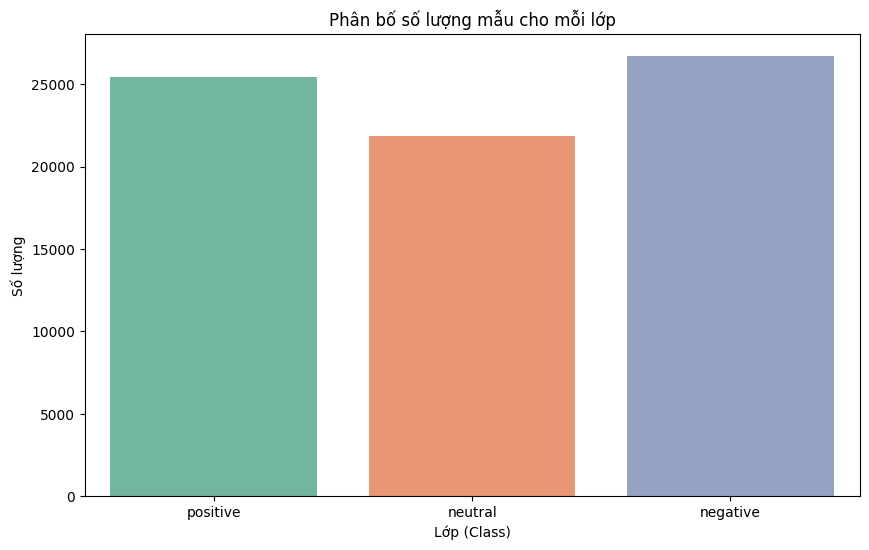

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=raw_corpus_full_data, x='Label', palette='Set2')
plt.title('Phân bố số lượng mẫu cho mỗi lớp')
plt.xlabel('Lớp (Class)')
plt.ylabel('Số lượng')
plt.show()

In [21]:
raw_corpus_full_data.to_csv("raw_corpus_full_data.csv")